# Análise Ranking CCONF

Neste notebook vamos analisar a aba municípios da planilha que contém os dados sobre a aplicação dos critérios 
elaborados pela CCONF. Previamente, juntamos a lista de municípios que tiveram CAPAG analisada e 
concluída pela GERAP/CORFI/COREM em 2020 (coluna "capag_analis"= True) a estes dados,  bem como a lista de municípios que tiveram 
operação de crédito aprovada em 2020 (coluna "oper_aprov" = True), de forma que a análise poderá ser feita na lista completa
de municípios da CCONF ou em um destes dois subgrupos. 

Vamos lá!

## Preparação: importando os dados da planilha
Começamos importando os dados da planilha para dentro de um Data Frame para podermos manipulá-los no python:

Vamos criar duas variáveis que guardam as colunas que: 
a) São relacionadas à capag:
b) Não são relacionadas à capag

In [19]:
col_capag = "A, BV, BZ,S:W, Y:AA, AL:AN, AS, AU: BA, BD:BF, BM, BO, BQ, BS, BU, BX, CB:CG"
col_nao_capag = "A, BV, BZ, B:R,X,AB:AK, AO:AR, AT, BB:BC, BG:BL, BN, BP, BR, BT, BX, CB:CG"
col_gerais = "A,BV, BW,BX,BY,BZ, CA, CB, CC"
col_id = "A"

Criando os Data Frames usando a library pandas

In [20]:
import pandas as pd
import numpy as np


path = r'./assets/Testes_Ranking_CCONF_2020-CAPAG.xlsx'
#path = r'C:\Users\fioro\PycharmProjects\ranking_cconf\assets\Testes_Ranking_CCONF_2020-CAPAG.xlsx'

dtype_cols = {"CD_GEOCMU":object,"capag_analis":object,"oper_aprov":object, "População": object, "Receita Corrente Líquida (2019)": object, "PIB per capita 2017 - a preços correntes (R$ 1,00)": object, "grupo pib per capita 2017": object }

data_capag = pd.read_excel(path, 'Municípios', usecols =   col_capag , skipfooter = 1, dtype = dtype_cols )
print(data_capag.dtypes)
#print(data_capag.shape)
#print(data_capag.head(5))

data_nao_capag = pd.read_excel(path, 'Municípios', usecols =  col_nao_capag , skipfooter = 1, dtype =dtype_cols)
#print(data_nao_capag.dtypes)
#print(data_nao_capag.shape)
#print(data_nao_capag.head(5))

data_total = pd.read_excel(path, 'Municípios', usecols =  col_nao_capag + col_capag, skipfooter = 1, dtype = dtype_cols)
#print(data_total.dtypes)
#print(data_total.shape)
#print(data_total.head(5))

CD_GEOCMU                                             object
D2_00003                                               int64
D2_00004                                               int64
D2_00005                                               int64
D2_00006                                               int64
D2_00007                                               int64
D2_00010                                               int64
D2_00011                                               int64
D2_00012                                               int64
D2_00023                                               int64
D2_00024                                               int64
D2_00028                                               int64
D2_00033                                               int64
D3_00002                                               int64
D3_00003                                               int64
D3_00005                                               int64
D3_00006                

## Escolha o conjunto de dados que quer usar na variável abaixo:

#### 0 = Lista completa com 5568 municípios
#### 1 = Lista de 45 municípios que tiveram CAPAG analisada e concluída pela GERAP/CORFI em 2020 (coluna "capag_analis"= True)
#### 2 - Lista de 102 municípios que tiveram  operação de crédito aprovada em 2020 (coluna "oper_aprov" = True)

In [21]:
#>>>>> ALTERE A VARIÁVEL ABAIXO e pressione "CTRL + ENTER" para simular com outro conjunto de dados. 
conjunto_dados = 0

if conjunto_dados == 1:
        data_capag_analis= data_capag[data_capag['capag_analis']== True]
        data_nao_capag_analis = data_nao_capag[data_nao_capag['capag_analis']== True]
        data_total_analis= data_total[data_total['capag_analis']== True]
        data_capag = data_capag_analis
        data_nao_capag = data_nao_capag_analis
        data_total = data_total_analis
        print('Você escolheu trabalhar com a lista de 45 municípios que tiveram CAPAG analisada e concluída')
elif conjunto_dados == 2:
        data_capag_aprov = data_capag[data_capag['oper_aprov']== True]
        data_nao_capag_aprov = data_nao_capag[data_nao_capag['oper_aprov']== True]
        data_total_aprov= data_total[data_total['oper_aprov']== True]
        data_capag = data_capag_aprov
        data_nao_capag = data_nao_capag_aprov
        data_total = data_total_aprov
       
        print('Você escolheu trabalhar com a lista de 102 municípios que tiveram  operação de crédito aprovada')
else:
        print('Você escolheu trabalhar com a lista completa')

Você escolheu trabalhar com a lista completa


## Análise Exploratória
Antes de tudo, vamos criar uma função para calcular a função de distribuição acumulada, ela será útil para entendermos a dinâmica de como os entes passam ou não em cada grupo de testes

In [22]:
def ecdf(data):
    """Calcular a função de distribuição cumulativa (FDC) for a one-dimensional array of measurements."""
    # Número de pontos de dados: n
    n = len(data)
    # dados do eixo X para o FDC : x
    x = np.sort(data)
    # dados do eixo y para o FDC: y
    y = np.arange(1, n+1) / n
    return x, y

a.	Qual a média/proporção de cada um dos testes?

In [23]:
medias_total = data_total.mean(axis=0)
print(medias_total)

CD_GEOCMU                                             3.253340e+06
D1_00001                                              9.742816e-01
D1_00002                                              8.484195e-01
D1_00003                                              9.671875e-01
D1_00004                                              9.549210e-01
                                                          ...     
D4_00015                                                       NaN
D4_00016                                              5.308908e-01
oper_aprov                                            9.053520e-01
capag_analis                                          8.081897e-03
PIB per capita 2017 - a preços correntes (R$ 1,00)    2.197506e+04
Length: 76, dtype: float64


a.1	Qual a média/proporção de cada um dos testes não capag?

In [24]:
medias_ncapag = data_nao_capag.mean(axis=0)
print(medias_ncapag)

CD_GEOCMU                                             3.253340e+06
D1_00001                                              9.742816e-01
D1_00002                                              8.484195e-01
D1_00003                                              9.671875e-01
D1_00004                                              9.549210e-01
D1_00005                                              0.000000e+00
D1_00006                                              4.615122e-01
D1_00007                                              5.739943e-01
D1_00008                                              4.375180e-01
D1_00009                                              4.635776e-01
D1_00010                                              0.000000e+00
D1_00011                                              9.109734e-01
D1_00012                                              8.438578e-01
D1_00013                                              8.729526e-01
D1_00014                                              9.521911

a.1	Qual a média/proporção de cada um dos testes  capag?

In [25]:
medias_capag = data_capag.mean(axis=0)
print(medias_capag)

CD_GEOCMU                                             3.253340e+06
D2_00003                                              7.500000e-01
D2_00004                                              8.006466e-01
D2_00005                                              8.268678e-01
D2_00006                                              8.342313e-01
D2_00007                                              8.336925e-01
D2_00010                                              8.308190e-01
D2_00011                                              8.297414e-01
D2_00012                                              7.392241e-01
D2_00023                                              8.279454e-01
D2_00024                                              8.283046e-01
D2_00028                                              7.282687e-01
D2_00033                                              7.367098e-01
D3_00002                                              7.965158e-01
D3_00003                                              7.516164

b.	Qual a distribuição das notas (somatório de todas as colunas)?
i.	Levando em consideração apenas os testes da CAPAG (colunas em amarelo)

O maior valor para a soma é : 27
O menor valor para a soma é : 0


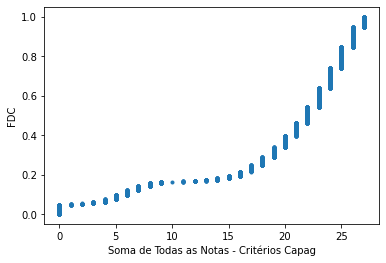

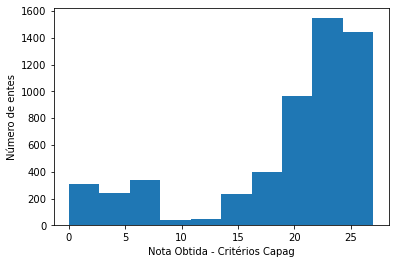

In [26]:
if "sum" in data_capag:
     data_capag["sum"].values[:] = 0
data_capag["sum"] = data_capag.sum(axis=1)
#print(data_capag["sum"])
print('O maior valor para a soma é : ' + str(data_capag["sum"].max()))
print('O menor valor para a soma é : ' + str(data_capag["sum"].min()))

#Plotando a  função de distribuição cumulativa (FDC): vamos gerar as variáveis  x_dist, y_dist. A primeira terá 
#todas as notas acumuladas, da menor até a maior. 
import matplotlib.pyplot as plt
x_dist, y_dist = ecdf(data_capag['sum'])
# Greando o plot
_= plt.plot(x_dist, y_dist, marker = ".", linestyle = 'none')
# Rotulando os eixos
_= plt.xlabel('Soma de Todas as Notas - Critérios Capag')
_= plt.ylabel('FDC')
# Mostrando o plot
plt.show()
#plotando o histograma da coluna das notas
_=plt.hist(data_capag['sum'])
_=plt.xlabel('Nota Obtida - Critérios Capag')
_=plt.ylabel('Número de entes')
plt.show()

b.	Qual a distribuição das notas (somatório de todas as colunas)?
ii.	Levando em consideração apenas os testes que não são da CAPAG (colunas não pintadas)

O maior valor para a soma é : 33.0
O menor valor para a soma é : 0.8


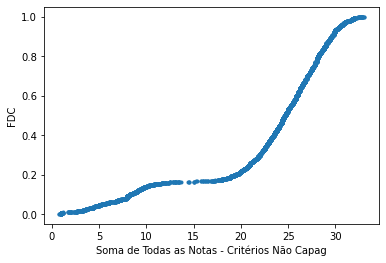

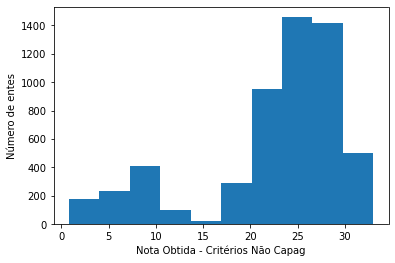

In [27]:
if "sum" in data_nao_capag:
     data_nao_capag["sum"].values[:] = 0
data_nao_capag["sum"] = data_nao_capag.sum(axis=1)
#print(data_nao_capag["sum"])
print('O maior valor para a soma é : ' + str(data_nao_capag["sum"].max()))
print('O menor valor para a soma é : ' + str(data_nao_capag["sum"].min()))

#Plotando a  função de distribuição cumulativa (FDC): vamos gerar as variáveus  x_dist, y_dist. A primeira, terá 
#todas as notas acumuladas, da menor até a maior. 

import matplotlib.pyplot as plt
x_dist_nc, y_dist_nc = ecdf(data_nao_capag['sum'])
_= plt.plot(x_dist_nc, y_dist_nc, marker = ".", linestyle = 'none')
_= plt.xlabel('Soma de Todas as Notas - Critérios Não Capag')
_= plt.ylabel('FDC')
plt.show()

#plotando o histograma da coluna das notas
_=plt.hist(data_nao_capag['sum'])
_=plt.xlabel('Nota Obtida - Critérios Não Capag')
_=plt.ylabel('Número de entes')
plt.show()

b.	Qual a distribuição das notas (somatório de todas as colunas)?
iii.	Levando em consideração todos os testes

O maior valor para a soma é : 60.0
O menor valor para a soma é : 0.8


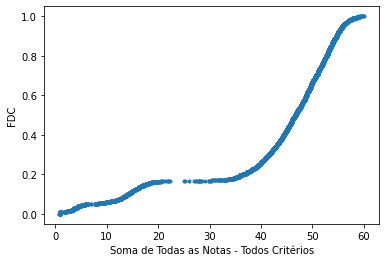

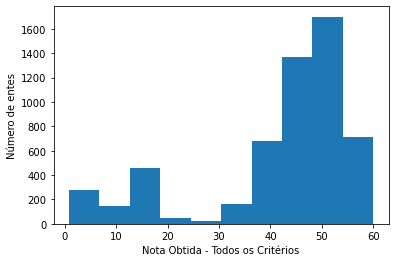

In [28]:
if "sum" in data_total:
     data_total["sum"].values[:] = 0
data_total["sum"] = data_total.sum(axis=1)
#print(data_total["sum"])
print('O maior valor para a soma é : ' + str(data_total["sum"].max()))
print('O menor valor para a soma é : ' + str(data_total["sum"].min()))

#Plotando a função de distribuição cumulativa (FDC): vamos gerar as variáveis  x_dist, y_dist. A primeira, terá 
#todas as notas acumuladas, da menor até a maior. 
import matplotlib.pyplot as plt
x_dist_total, y_dist_total = ecdf(data_total['sum'])
_= plt.plot(x_dist_total, y_dist_total, marker = ".", linestyle = 'none')
_= plt.xlabel('Soma de Todas as Notas - Todos Critérios')
_= plt.ylabel('FDC')
plt.show()
#plotando o histograma da coluna das notas
_=plt.hist(data_total['sum'])
_=plt.xlabel('Nota Obtida - Todos os Critérios')
_=plt.ylabel('Número de entes')
plt.show()

## Simulações de classificação 
Vamos agora realizar 2 tipos de simulações. 

### a.	Alternativa I: classificação conjunta em duas etapas

#### i.	Primeiro,  somando todos os testes relacionados à CAPAG

##### i.	1.	Caso o município tenha resultado maior ou igual a x, classifique-o na zona 1

In [29]:
#>>>>> ALTERE A VARIÁVEL ABAIXO e pressione "CTRL + ENTER" para simular com outra nota de corte.
nota_corte_capag = 25

if 'Aprovado' in data_capag:
     data_capag['Aprovado'].values[:] = 0

#Gerando a coluna com os aprovados 

data_capag['Aprovado'] = np.where(data_capag["sum"]>= nota_corte_capag, True, False)
#print(data_capag['Aprovado'].head(200))

# Calculando o percentual de aprovados 
n_entes = data_capag.shape[0]
print('Total de Entes :' + str(n_entes))
num_aprovados = sum(data_capag['Aprovado'])
print('O número de entes de aprovados na zona 1 com nota de corte de ' + str(nota_corte_capag) + ' seria de: ' + str(num_aprovados))
print('O percentual de aprovados na zona 1 seria de : ' + "{:.2%}".format(num_aprovados/n_entes))

Total de Entes :5568
O número de entes de aprovados na zona 1 com nota de corte de 25 seria de: 1444
O percentual de aprovados na zona 1 seria de : 25.93%


#### ii.	Somando os testes não relacionados à CAPAG
##### 1.	Se o ente estiver na zona 1
    a.	Caso o ente tenha resultado maior ou igual a y1, classifique-o com nota final A
    b.	Caso o ente tenha resultado maior ou igual a y2 e menor que y1, classifique-o com nota final B
    c.	Caso o ente tenha resultado menor que y3, classifique-o com nota final C (erro: tenha resultado menor do que y2)
##### 2.	Se o ente estiver na zona 2
    a.	Caso o ente tenha resultado maior ou igual a y3, classifique-o com nota final D
    b.	Caso o ente tenha resultado menor que y3, classifique-o com nota final E

In [30]:
# Selecionando a coluna dos aprovados/reprovados na zona 1
df_aprovados = data_capag.Aprovado
# Trazendo a coluna dos aprovados nos critérios de Capag (zona 1) para o Data Frame que contém os critérios não relacionados à Capag 
data_nao_capag_c_a = pd.concat([data_nao_capag, df_aprovados], axis=1)
#verificando a concatenação
data_nao_capag_c_a.columns
print(data_nao_capag_c_a.head(2))
# calculando a nota dos critérios não capag
#>>>> ALETERE OS VALORES ABAIXO para simular com outras notas de CORTE
nota_corte_y1 = 30
nota_corte_y2 = 25


# criando a lista das 5 condições
conditions = [
    (data_nao_capag_c_a['Aprovado'] ) & (data_nao_capag_c_a['sum'] >= nota_corte_y1),
    (data_nao_capag_c_a['Aprovado'] ) & (data_nao_capag_c_a['sum'] < nota_corte_y1),
    (~ data_nao_capag_c_a['Aprovado'] ) & (data_nao_capag_c_a['sum'] >= nota_corte_y2),
    (~ data_nao_capag_c_a['Aprovado'] ) & (data_nao_capag_c_a['sum'] < nota_corte_y2)
    ]
# criando a lista de valores que queremos associar a cada condição
values = ['A', 'B', 'C', 'D']

if 'capag' in data_nao_capag_c_a:
     data_nao_capag_c_a['capag'].values[:] = 0

# criando uma nova coluna e usando o np.select para associar os valores usando nossa lista como argumento
data_nao_capag_c_a['capag'] = np.select(conditions, values)


  CD_GEOCMU  D1_00001  D1_00002  D1_00003  D1_00004  D1_00005  D1_00006  \
0   4200556       1.0         1       1.0       1.0         0       1.0   
1   4317004       1.0         1       1.0       1.0         0       1.0   

   D1_00007  D1_00008  D1_00009  ...  Capital?  UF  oper_aprov  capag_analis  \
0         1       1.0       1.0  ...       Não  SC       False         False   
1         1       1.0       1.0  ...       Não  RS       False         False   

   População  Receita Corrente Líquida (2019)  \
0       2378                      1.65479e+07   
1       8130                      2.67582e+07   

   PIB per capita 2017 - a preços correntes (R$ 1,00)  \
0                                            39069.5    
1                                            20850.5    

   grupo pib per capita 2017   sum  Aprovado  
0           4 - Acima de 26k  33.0      True  
1         3 - Entre 16 e 26K  32.8      True  

[2 rows x 57 columns]


In [31]:
# Mostrando a Tabela final com a classificação
#data_nao_capag_c_a.head(10)

# Mostrando a quantidade de entes em cada classe de nota - geral
class_alt1_g = data_nao_capag_c_a.groupby(['capag']).size().to_frame('size').reset_index().sort_values([ 'capag'], ascending=[True])
print('Tabela de Resultados da Simulação da Alternativa 1 - contagem de notas : ')
print(class_alt1_g)
# Obtendo o tamanho geral do número de entes do data frame
todos = data_nao_capag_c_a.shape[0]
#print (uf)
# Fazendo a divisão final para mostrar as notas em termos percentuais. 
c_g = data_nao_capag_c_a.groupby(['capag']).size().to_frame('size')

class_alt1_final_g = c_g / todos

###### Tabela de Classificação Final - Alternativa 1 - Percentuais Gerais

print('Tabela de Resultados da Simulação da Alternativa 1 - Percentuais Gerais : ')
print(class_alt1_final_g)

#Mostrando a quantidade de entes em cada classe de nota por estado
class_alt1 = data_nao_capag_c_a.groupby(['UF', 'capag']).size().to_frame('size').reset_index().sort_values(['UF', 'capag'], ascending=[True, True])
print('Tabela de Resultados da Simulação da Alternativa 1 - contagem de notas por Estado : ')
print(class_alt1)
# Mostrando a quantidade de entes por UF
#uf = data_nao_capag_c_a.groupby(['UF']).size().to_frame('size')
#print (uf)
# Fazendo a divisão final para mostrar as notas por UF em termos percentuais. 
c = data_nao_capag_c_a.groupby(['UF', 'capag']).size().to_frame('size')
class_alt1_final = c / c.groupby(level=0).sum()

###### Tabela de Classificação Final - Alternativa 1 - Percentuais por Estado

print('Tabela de Resultados da Simulação da Alternativa 1 - Percentuais por Estado : ')
print (class_alt1_final)


# Mostrando a quantidade de entes em cada classe de nota por grupo de pib per capita
class_alt1_pib = data_nao_capag_c_a.groupby(['grupo pib per capita 2017', 'capag']).size().to_frame('size').reset_index().sort_values(['grupo pib per capita 2017', 'capag'], ascending=[True, True])
print('Tabela de Resultados da Simulação da Alternativa 1 - contagem de notas por grupo de pib per capita : ')
print(class_alt1_pib)
# Mostrando a quantidade de entes por UF
#uf_2 = data_total_c_a.groupby(['UF']).size().to_frame('size')
#print (uf_2)
# Fazendo a divisão final para mostrar as notas por grupo de pib per capita em termos percentuais. 
c_1_pib = data_nao_capag_c_a.groupby(['grupo pib per capita 2017', 'capag']).size().to_frame('size')
class_alt1_final_pib = c_1_pib / c_1_pib.groupby(level=0).sum()

###### Tabela de Classificação Final - Alternativa 1 - Percentuais por grupo de pib per capita 

print('Tabela de Resultados da Simulação da Alternativa 1 - Percentuais por grupo de pib per capita : ')
print (class_alt1_final_pib)

Tabela de Resultados da Simulação da Alternativa 1 - contagem de notas : 
  capag  size
0     A   275
1     B  1169
2     C  1450
3     D  2674
Tabela de Resultados da Simulação da Alternativa 1 - Percentuais Gerais : 
           size
capag          
A      0.049389
B      0.209950
C      0.260417
D      0.480244
Tabela de Resultados da Simulação da Alternativa 1 - contagem de notas por Estado : 
    UF capag  size
0   AC     B     3
1   AC     C     7
2   AC     D    12
3   AL     B     2
4   AL     C     1
..  ..   ...   ...
88  SP     B   261
89  SP     C   164
90  SP     D   205
91  TO     C     9
92  TO     D   130

[93 rows x 3 columns]
Tabela de Resultados da Simulação da Alternativa 1 - Percentuais por Estado : 
              size
UF capag          
AC B      0.136364
   C      0.318182
   D      0.545455
AL B      0.019608
   C      0.009804
...            ...
SP B      0.404651
   C      0.254264
   D      0.317829
TO C      0.064748
   D      0.935252

[93 rows x 1 columns]


###### Exportando a simulação da alternativa 1 para o Excel

In [32]:
with pd.ExcelWriter('sim_alt1_c_dados.xlsx') as writer:  
    class_alt1.to_excel(writer, sheet_name='Res_Simul_1')
    class_alt1_final_g.to_excel(writer, sheet_name='Res_F_Simul_1_Ger')
    class_alt1_final_pib.to_excel(writer, sheet_name='Res_F_Simul_1_pib')
    class_alt1_final.to_excel(writer, sheet_name='Res_F_Simul_1')
    data_nao_capag_c_a.to_excel(writer, sheet_name='Dados_Simul_1')


### b.	Alternativa II: classificação dupla (AA, AB etc)

#### i.	 Primeiro, somando todos os testes relacionados à CAPAG
    1.	Caso o município tenha resultado maior ou igual a z, classifique-o com a primeira entrada “A”
    2.	Caso contrário, primeira entrada “B”

In [33]:
#>>>>> ALTERE A VARIÁVEL ABAIXO e pressione "CTRL + ENTER" para simular com outra nota de corte.
nota_corte_capag_z = 25

if 'Aprovado_II_A' in data_capag:
     data_capag['Aprovado_II_A'].values[:] = 0

#Gerando a coluna com os aprovados 
data_capag['Aprovado_II_A'] = np.where(data_capag["sum"]>= nota_corte_capag_z, True, False)
#print(data_capag['Aprovado'].head(200))

# criando a lista das 2 condições
conditions = [
    (data_capag['Aprovado_II_A'] ),
    (~ data_capag['Aprovado_II_A'] )            
    ]


# criando a lista de valores que queremos associar a cada condição
values = ['A', 'B']

# criando uma nova coluna e usando o np.select para associar os valores usando nossa lista como argumento
data_capag['Aprovado_II_A_class'] = np.select(conditions, values)

print (data_capag[data_capag.Aprovado_II_A_class == 'A'].shape[0])

#print(len(data_capag[data_capag['Aprovado_II_A_class'] == 'A']))

# Calculando o percentual de aprovados 
n_entes_II = data_capag.shape[0]
print('Total de Entes :' + str(n_entes))
num_aprovados_II = len(data_capag[data_capag['Aprovado_II_A_class'] == 'A'])
print('O número de entes de aprovados - classificação A - com nota de corte de ' + str(nota_corte_capag_z) + ' seria de: ' + str(num_aprovados_II))
print('O percentual de aprovados com classificação A seria de : ' + "{:.2%}".format(num_aprovados_II/n_entes_II))

print (data_capag)

1444
Total de Entes :5568
O número de entes de aprovados - classificação A - com nota de corte de 25 seria de: 1444
O percentual de aprovados com classificação A seria de : 25.93%
     CD_GEOCMU  D2_00003  D2_00004  D2_00005  D2_00006  D2_00007  D2_00010  \
0      4200556         1         1         1         1         1         1   
1      4317004         1         1         1         1         1         1   
2      3165578         1         1         1         1         1         1   
3      4320321         1         1         1         1         1         1   
4      2103554         1         1         1         1         1         1   
...        ...       ...       ...       ...       ...       ...       ...   
5563   5107800         0         0         0         0         0         0   
5564   5108204         0         0         0         0         0         0   
5565   5214903         0         0         0         0         0         0   
5566   2203008         0         0      

#### ii. Depois, somando todos os testes (inclusive os da CAPAG)
    1.	Caso o ente tenha nota maior ou igual a k1, classifique-o com a segunda entrada “A”
    2.	Caso o ente tenha nota menor que k1, mas maior ou igual a k2, classifique-o com a segunda entrada “B”
    3.	Caso o ente tenha nota menor que k2, classifique-o com a segunda entrada “C”
#### iii. Depois, combinando a primeira entrada com a segunda. Registre o resultado


In [34]:
# Selecionando a coluna dos aprovados - classificação A
df_aprovados_total = data_capag.Aprovado_II_A
# Trazendo a coluna dos aprovados no critério classificação A para o Data Frame que contém os todos os critérios da CCONF (Capag e Não Capag)
data_total_c_a = pd.concat([data_total, df_aprovados_total], axis=1)
#verificando a concatenação
data_total_c_a.columns
print(data_total_c_a.head(2))
# calculando a nota com todos os critérios
#>>>> ALETERE OS VALORES ABAIXO para simular com outras notas de CORTE
nota_corte_k1 = 55
nota_corte_k2 = 45

# criando a lista das 5 condições
conditions = [
    (data_total_c_a['Aprovado_II_A'] ) & (data_total_c_a['sum'] >= nota_corte_k1),
    (data_total_c_a['Aprovado_II_A'] ) & (data_total_c_a['sum'] <  nota_corte_k2), 
    (data_total_c_a['Aprovado_II_A'] ) & ((data_total_c_a['sum'] < nota_corte_k1) & (data_total_c_a['sum'] >= nota_corte_k2)),          
    (~ data_total_c_a['Aprovado_II_A'] ) & (data_total_c_a['sum'] >= nota_corte_k1),
    (~ data_total_c_a['Aprovado_II_A'] ) & ((data_total_c_a['sum'] < nota_corte_k1) & (data_total_c_a['sum'] >= nota_corte_k2)),
    (~ data_total_c_a['Aprovado_II_A'] ) & (data_total_c_a['sum'] <  nota_corte_k2)           
    ]
# criando a lista de valores que queremos associar a cada condição
values = ['AA', 'AC','AB', 'BA', 'BB', 'BC']

# criando uma nova coluna e usando o np.select para associar os valores usando nossa lista como argumento
data_total_c_a['capag_II'] = np.select(conditions, values)

# Mostrando a Tabela final com a classificação
#data_total_c_a.head(10)

# Mostrando a quantidade de entes em cada classe de nota - geral
class_alt2_g = data_total_c_a.groupby(['capag_II']).size().to_frame('size').reset_index().sort_values([ 'capag_II'], ascending=[True])
print('Tabela de Resultados da Simulação da Alternativa 2 - contagem de notas : ')
print(class_alt2_g)
# Obtendo o tamanho geral do número de entes do data frame
todos_2 = data_total_c_a.shape[0]
#print (uf)
# Fazendo a divisão final para mostrar as notas em termos percentuais. 
c_g = data_total_c_a.groupby(['capag_II']).size().to_frame('size')
class_alt2_final_g = c_g / todos_2

###### Tabela de Classificação Final - Alternativa 2 - Percentuais Gerais

print('Tabela de Resultados da Simulação da Alternativa 2 - Percentuais Gerais : ')
print(class_alt2_final_g)


# Mostrando a quantidade de entes em cada classe de nota por estado
class_alt2 = data_total_c_a.groupby(['UF', 'capag_II']).size().to_frame('size').reset_index().sort_values(['UF', 'capag_II'], ascending=[True, True])
print('Tabela de Resultados da Simulação da Alternativa 2 - contagem de notas por Estado : ')
print(class_alt2)
# Mostrando a quantidade de entes por UF
#uf_2 = data_total_c_a.groupby(['UF']).size().to_frame('size')
#print (uf_2)
# Fazendo a divisão final para mostrar as notas por UF em termos percentuais. 
c_2 = data_total_c_a.groupby(['UF', 'capag_II']).size().to_frame('size')
class_alt2_final = c_2 / c_2.groupby(level=0).sum()

###### Tabela de Classificação Final - Alternativa 2 - Percentuais por Estado

print('Tabela de Resultados da Simulação da Alternativa 2 - Percentuais por Estado : ')
print (class_alt2_final)


# Mostrando a quantidade de entes em cada classe de nota por grupo de pib per capita
class_alt2_pib = data_total_c_a.groupby(['grupo pib per capita 2017', 'capag_II']).size().to_frame('size').reset_index().sort_values(['grupo pib per capita 2017', 'capag_II'], ascending=[True, True])
print('Tabela de Resultados da Simulação da Alternativa 2 - contagem de notas por grupo de pib per capita : ')
print(class_alt2_pib)
# Mostrando a quantidade de entes por UF
#uf_2 = data_total_c_a.groupby(['UF']).size().to_frame('size')
#print (uf_2)
# Fazendo a divisão final para mostrar as notas por grupo de pib per capita em termos percentuais. 
c_2_pib = data_total_c_a.groupby(['grupo pib per capita 2017', 'capag_II']).size().to_frame('size')
class_alt2_final_pib = c_2_pib / c_2_pib.groupby(level=0).sum()

###### Tabela de Classificação Final - Alternativa 2 - Percentuais por grupo de pib per capita 

print('Tabela de Resultados da Simulação da Alternativa 2 - Percentuais por grupo de pib per capita : ')
print (class_alt2_final_pib)

  CD_GEOCMU  D1_00001  D1_00002  D1_00003  D1_00004  D1_00005  D1_00006  \
0   4200556       1.0         1       1.0       1.0         0       1.0   
1   4317004       1.0         1       1.0       1.0         0       1.0   

   D1_00007  D1_00008  D1_00009  ...  Capital?  UF  oper_aprov  capag_analis  \
0         1       1.0       1.0  ...       Não  SC       False         False   
1         1       1.0       1.0  ...       Não  RS       False         False   

   População  Receita Corrente Líquida (2019)  \
0       2378                      1.65479e+07   
1       8130                      2.67582e+07   

   PIB per capita 2017 - a preços correntes (R$ 1,00)  \
0                                            39069.5    
1                                            20850.5    

   grupo pib per capita 2017   sum  Aprovado_II_A  
0           4 - Acima de 26k  60.0           True  
1         3 - Entre 16 e 26K  59.8           True  

[2 rows x 84 columns]
Tabela de Resultados da Simulação 

###### Exportando a simulação da alternativa 2 para o Excel

In [35]:
with pd.ExcelWriter('sim_alt2_c_dados.xlsx') as writer:  
    class_alt2.to_excel(writer, sheet_name='Res_Simul_2')
    class_alt2_final_g.to_excel(writer, sheet_name='Res_F_Simul_2_Ger')
    class_alt2_final_pib.to_excel(writer, sheet_name='Res_F_Simul_2_pib')
    class_alt2_final.to_excel(writer, sheet_name='Res_F_Simul_2')
    data_total_c_a.to_excel(writer, sheet_name='Dados_Simul_2')

# Visualizando os mapas das simulações
## Baixando os shapefiles do IBGE

In [37]:
import matplotlib.pyplot as plt
%matplotlib inline
import geopandas as gpd
import pandas as pd
import numpy as np
import mapclassify
import fiona

#zipfile = "ftp://geoftp.ibge.gov.br/organizacao_do_territorio/malhas_territoriais/malhas_municipais/municipio_2017/Brasil/BR/br_municipios.zip"

path_map = r'./assets/BRMUE250GC_SIR.shp'
br_map = gpd.read_file(path_map)

## Visualizando o Mapa da simulação 1
    ### 'A' = Verde Escuro
    ### 'B' = Verde Claro
    ### 'C' = Vermelho Claro
    ### 'D' = Vermelho Escuro

No handles with labels found to put in legend.


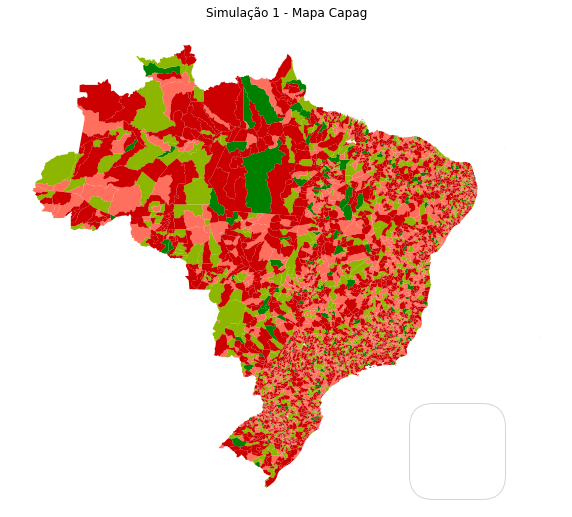

In [38]:
data_simu_1 = pd.read_excel(r'./sim_alt1_c_dados.xlsx', 'Dados_Simul_1', dtype = {'CD_GEOCMU': object, "Capital?":bool},true_values = ["Sim"],false_values = ["Não"] )

br_map_capag_sim_1j  = br_map.join(data_simu_1, lsuffix='CD_GEOCMU', rsuffix='CD_GEOCMU')

#removendo aproximadamente 15 linhas de municípios onde o join não funcionou e gerou nulos 
br_map_capag_sim_1j = br_map_capag_sim_1j[br_map_capag_sim_1j['capag'].notna()]

# associando as notas às cores que desejamos
conditions = [
    (br_map_capag_sim_1j['capag'] == 'A'),
    (br_map_capag_sim_1j['capag'] == 'B'),
    (br_map_capag_sim_1j['capag'] == 'C'),
    (br_map_capag_sim_1j['capag'] == 'D'),    
    ]
# criando a lista de valores que queremos associar a cada condição

values = ['#008000', '#8db600', '#fe6f5e', '#cc0000']
 
# criando uma nova coluna e usando o np.select para associar os valores usando nossa lista como argumento
br_map_capag_sim_1j['color'] = np.select(conditions, values)


paleta_capag = {'A': '#008000',
               'B': '#8db600',
               'C': '#fe6f5e',
               'D': '#cc0000'}

# Plotando os dados
fig, ax = plt.subplots(figsize=(10, 10))

# fazendo um loop por cada tipo de atributo e plotando usando as cores definidas no dicionário
for tipocor, data in br_map_capag_sim_1j.groupby('capag'):
    
    # Definido as cores de cadagrupo usando o dicionário
    color = paleta_capag[tipocor]
    
    # Plotando cada grupo usando as cores definidas acima
    data.plot(color=color,
              ax=ax,
              label=tipocor)
                            
# Abaixo temos o controle da legenda.
  # bbox = x,y -> é possível posicionar o box da legenda
  #rpop= tamanho do box da legenda
  #loc = posicionamento geral da legenda no mapa

ax.legend( bbox_to_anchor=(1.0,- .1), prop={'size': 120}, loc='lower right', frameon =True)
ax.set(title='Simulação 1 - Mapa Capag')

# o comando abaixo serve para retirar o grid coordenadas, basta comentar para retirá-lo
ax.set_axis_off()
plt.show()

## Visualizando o Mapa da simulação 2

    ### 'AA' = Verde Escuro
    ### 'AB' = Verde Claro
    ### 'AC' = Azul Escuro
    ### 'BA' = Amarelo
    ### 'BB' = Vermelho Claro
    ### 'BC' = Vermelho Escuro

No handles with labels found to put in legend.


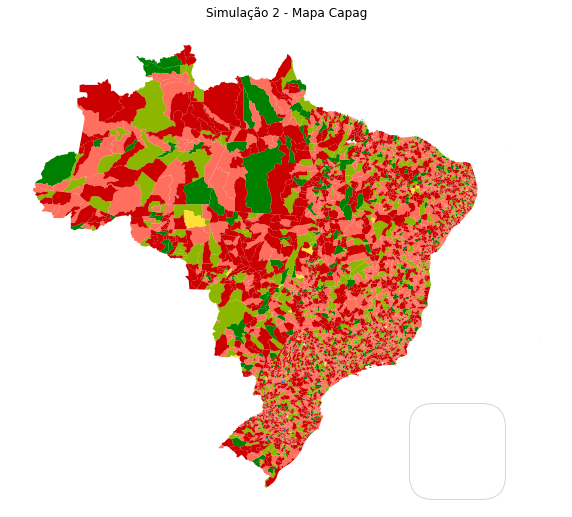

In [40]:
#C:\Users\fioro\PycharmProjects\ranking_cconf
data_simu_2 = pd.read_excel(r'./sim_alt2_c_dados.xlsx', 'Dados_Simul_2', dtype = {'CD_GEOCMU': object, "Capital?":bool},true_values = ["Sim"],false_values = ["Não"] )

br_map_capag_sim_2j  = br_map.join(data_simu_2, lsuffix='CD_GEOCMU', rsuffix='CD_GEOCMU')

#removendo aproximadamente 15 linhas de municípios onde o join não funcionou e gerou nulos 
br_map_capag_sim_2j = br_map_capag_sim_2j[br_map_capag_sim_2j['capag_II'].notna()]

# associando as notas às cores que desejamos
conditions = [
    (br_map_capag_sim_2j['capag_II'] == 'AA'),
    (br_map_capag_sim_2j['capag_II'] == 'AB'),
    (br_map_capag_sim_2j['capag_II'] == 'AC'),
    (br_map_capag_sim_2j['capag_II'] == 'BA'),
    (br_map_capag_sim_2j['capag_II'] == 'BB'),
    (br_map_capag_sim_2j['capag_II'] == 'BC'),
    ]
# criando a lista de valores que queremos associar a cada condição

values = ['#008000', '#8db600', '#007fff', '#ffe135', '#fe6f5e', '#cc0000']
 
# criando uma nova coluna e usando o np.select para associar os valores usando nossa lista como argumento
br_map_capag_sim_2j['color'] = np.select(conditions, values)


paleta_capag = {'AA': '#008000',
               'AB': '#8db600',
               'AC': '#007fff',
                'BA': '#ffe135',
                'BB': '#fe6f5e',
               'BC': '#cc0000'}

# Plotando os dados
fig, ax = plt.subplots(figsize=(10, 10))

# fazendo um loop por cada tipo de atributo e plotando usando as cores definidas no dicionário
for tipocor, data in br_map_capag_sim_2j.groupby('capag_II'):
    
    # Definido as cores de cadagrupo usando o dicionário
    color = paleta_capag[tipocor]
    
    # Plotando cada grupo usando as cores definidas acima
    data.plot(color=color,
              ax=ax,
              label=tipocor)
                            
# Abaixo temos o controle da legenda.
  # bbox = x,y -> é possível posicionar o box da legenda
  #rpop= tamanho do box da legenda
  #loc = posicionamento geral da legenda no mapa

ax.legend( bbox_to_anchor=(1.0,- .1), prop={'size': 120}, loc='lower right', frameon =True)
ax.set(title='Simulação 2 - Mapa Capag')

# o comando abaixo serve para retirar o grid coordenadas, basta comentar para retirá-lo
ax.set_axis_off()
plt.show()

Ficamos por aqui!

